# Homework 7 writeup solutions

## Name: Karsten Onarheim

## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.integrate

### Part a - Timing RK45 and BDF

In [2]:
######################### Coding problem 2 ###################
s = 77.27
w = 0.161
q = 1
y0 = [1, 2, 3]
y1_prime = lambda y1, y2, y3: s*(y2 - y1*y2 + y1 - q*y1**2)
y2_prime = lambda y1, y2, y3: 1/s * (-y2 - y1*y2 + y3)
y3_prime = lambda y1, y2, y3: w*(y1 - y3)
odefun = lambda t, y: [y1_prime(y[0], y[1], y[2]),
                       y2_prime(y[0], y[1], y[2]),
                       y3_prime(y[0], y[1], y[2])]
## Solve for 10 logarithmically spaced points, using RK45
RK45sol = np.zeros([3, 10])
RK45time = np.zeros(10)
qvals = np.logspace(0, -5, 10)
counter = 0
for q in qvals:
    RK45time[counter] = time.time()
    yFinal = scipy.integrate.solve_ivp(odefun, [0,30], y0).y
    RK45time[counter] = time.time() - RK45time[counter]
    RK45sol[0][counter] = yFinal[0][-1]
    RK45sol[1][counter] = yFinal[1][-1]
    RK45sol[2][counter] = yFinal[2][-1]
    counter = counter + 1

## Solve for 10 logarithmically spaced points, using BDF
BDFsol = np.zeros([3, 10])
BDFtime = np.zeros(10)
counter = 0
for q in qvals:
    BDFtime[counter] = time.time()
    yFinal = scipy.integrate.solve_ivp(odefun, [0,30], y0, method="BDF").y
    BDFtime[counter] = time.time() - BDFtime[counter]
    BDFsol[0][counter] = yFinal[0][-1]
    BDFsol[1][counter] = yFinal[1][-1]
    BDFsol[2][counter] = yFinal[2][-1]
    counter = counter + 1

### Part b - Create a loglog plot
Make sure to use plot *markers* not lines for the data, and label the axes! 

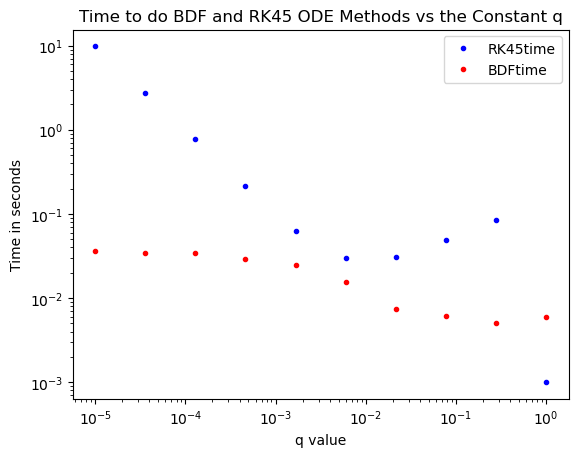

In [3]:
plt.loglog(qvals, RK45time, color="blue", marker=".", linewidth="0", label="RK45time")
plt.loglog(qvals, BDFtime, color="red", marker=".", linewidth="0", label="BDFtime")
plt.title("Time to do BDF and RK45 ODE Methods vs the Constant q")
plt.xlabel("q value")
plt.ylabel("Time in seconds")
plt.legend()

### Part c - Create a 2 panel figure.
We have not yet done this in class, but it's about time we teach you because it's an important skill! 

Below I'll show how to do that plotting $y = x^2$ in the upper figure and $y = x^3$ in the lower figure.

Text(0.5, 1.0, 'small q and large q reactions vs time')

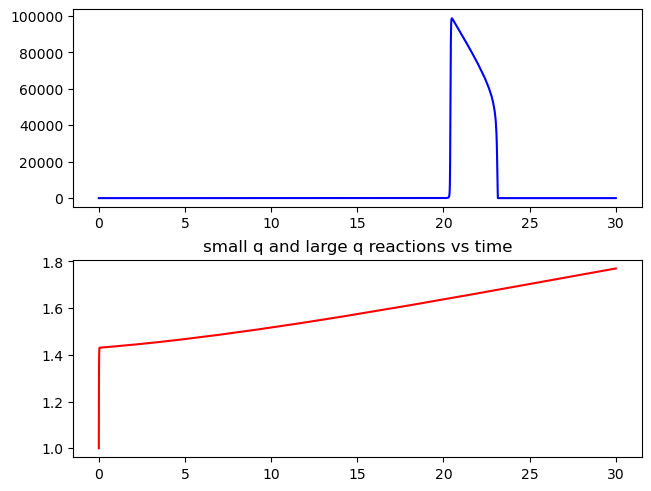

In [4]:
q = qvals[-1]
val1 = scipy.integrate.solve_ivp(odefun, [0,30], y0, method="BDF")
y1val1 = val1.y[0]
tval1 = val1.t

q = qvals[1]
val2 = scipy.integrate.solve_ivp(odefun, [0,30], y0, method="BDF")
y1val2 = val2.y[0]
tval2 = val2.t

x = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(2, 1, constrained_layout=True)
ax[0].plot(tval1, y1val1, 'b') 
ax[1].plot(tval2, y1val2, 'r')

plt.title("small q and large q reactions vs time")

### Part d - Comment on what we see.

##### Part (i) - Compare the two methods

The time to go through the method is quicker with BDF than RK45 as long as q is less than 1 (when q is small, BDF is quicker). When q is 1, RK45 is faster.

##### Part (ii) - Time as q increases

The time to solve RK45 increases on a line on the loglog plot as q gets smaller. This means it is some kind of power function. Since the slope appears to be roughly -1, that means it is close to a 1/x, or inverse, relationship. As q increases, t increases roughly inversely.

##### Part (iii) - What makes calculation slower for RK45?

For RK45 it seems to take a long time to calculate because the slope ramps up very rapidly, approaching near vertical, and then quickly jumps back down. This jagged line and large slope makes it difficult to compute quickly and slows it down a lot.

##### Part (iv) - Is this equation stiff? How do we know?

The equation with the small q is stiff. We can tell because BDF takes SO much less time, and also because there is a sharp incline (around 20.5 seconds) in the y1 vs t values.

## Problem 2

In [45]:
mu = 200
dydt = lambda x, y: mu*(1 - x**2)*y - x
dxdt = lambda x, y: y
# Solve using BDF
x0 = 2
y0 = 0

odefun = lambda t, xy: [dxdt(xy[0], xy[1]), dydt(xy[0], xy[1])]
sol3RK45 = scipy.integrate.solve_ivp(odefun, [0, 400], [x0, y0])
RK45x = A8 = sol3RK45.y[0]
RK45t = sol3RK45.t

sol3BDF = scipy.integrate.solve_ivp(odefun, [0, 400], [x0, y0], method="BDF")
BDFx = A9 = sol3BDF.y[0]
BDFt = sol3BDF.t

sol3BDF2 = scipy.integrate.solve_ivp(odefun, [0, 400], [x0, y0], method="BDF", 
                                    t_eval=np.linspace(0, 400, 10_000_000))
BDFx2 = sol3BDF2.y[0]
BDFy2 = sol3BDF2.y[1]


print(len(A8))
print(len(A9))
print(len(A8)/len(A9))

46401
298
155.70805369127515


### Part a - Ratio of points, RK45 to BDF.
The ratio of points RK45 to BDF is 155.71 (RK45 takes 155.71 times as many points as BDF)

#### Part b - Plot solution, x(t)

Text(0.5, 1.0, 'Distance of Oscillator vs Time (BDF Method)')

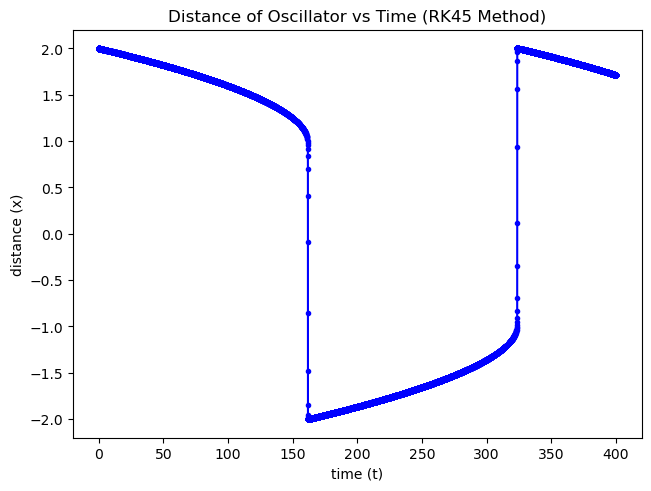

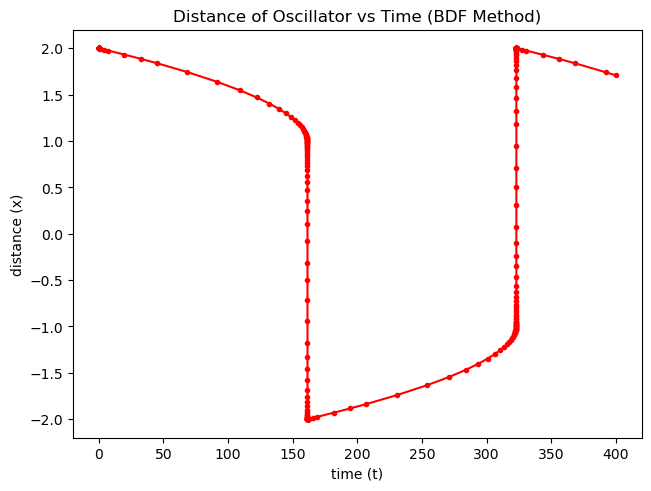

In [49]:
fig1, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(RK45t, RK45x, color="blue", marker=".")
plt.xlabel("time (t)")
plt.ylabel("distance (x)")
plt.title("Distance of Oscillator vs Time (RK45 Method)")

fig2, ax2 = plt.subplots(constrained_layout=True)
ax2.plot(BDFt, BDFx, color="red", marker=".")
plt.xlabel("time (t)")
plt.ylabel("distance (x)")
plt.title("Distance of Oscillator vs Time (BDF Method)")

##### Part c - Plot x(t) vs. y(t) (y(t) on vertical axis)

Text(0.5, 1.0, 'Speed vs Distance of Oscillator (BDF Method)')

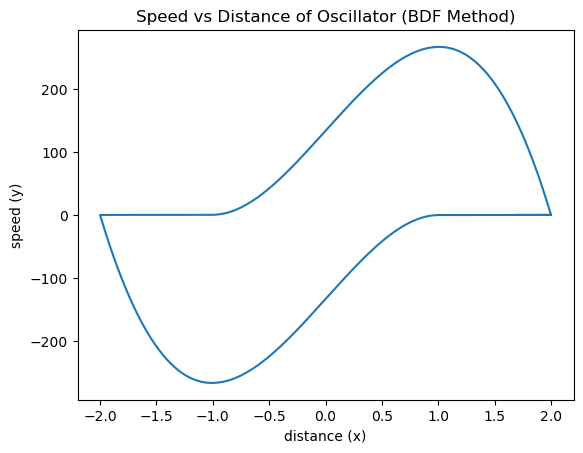

In [51]:
plt.plot(BDFx2, BDFy2)
plt.xlabel("distance (x)")
plt.ylabel("speed (y)")
plt.title("Speed vs Distance of Oscillator (BDF Method)")

##### Part d - Discussion

We can tell this ODE is stiff because it takes way more iterations to do with an explicit than an implicit method, taking 155.71 times as many points for the RK45 than for the BDF method. It also has very sharp slope differences from steep to flat slopes, being 0 for some time and positive or negative 275 ish at other times. 